In [21]:
from FISHClass.utils.evaluation import get_top_model
from FISHClass.datasets import MYCN
from FISHClass.utils.device import best_gpu
from torch.utils.data import DataLoader
from FISHClass.utils.visualize import bbox_on_image, gridPlot
import matplotlib.pyplot as plt
import torch

In [56]:
device = best_gpu()
model = get_top_model("/home/simon_g/src/testing/trained_models/fasterrcnn/green_mask")
dataset = MYCN("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/results/h5/dilutions_cleaned.h5", "S20", transform=None, norm_type=None, channels=["green"], mask=True, n=200)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

Loaded FasterRCNN from /home/simon_g/src/testing/trained_models/fasterrcnn/green_mask/FasterRCNN_20220923_134240475.pt


200


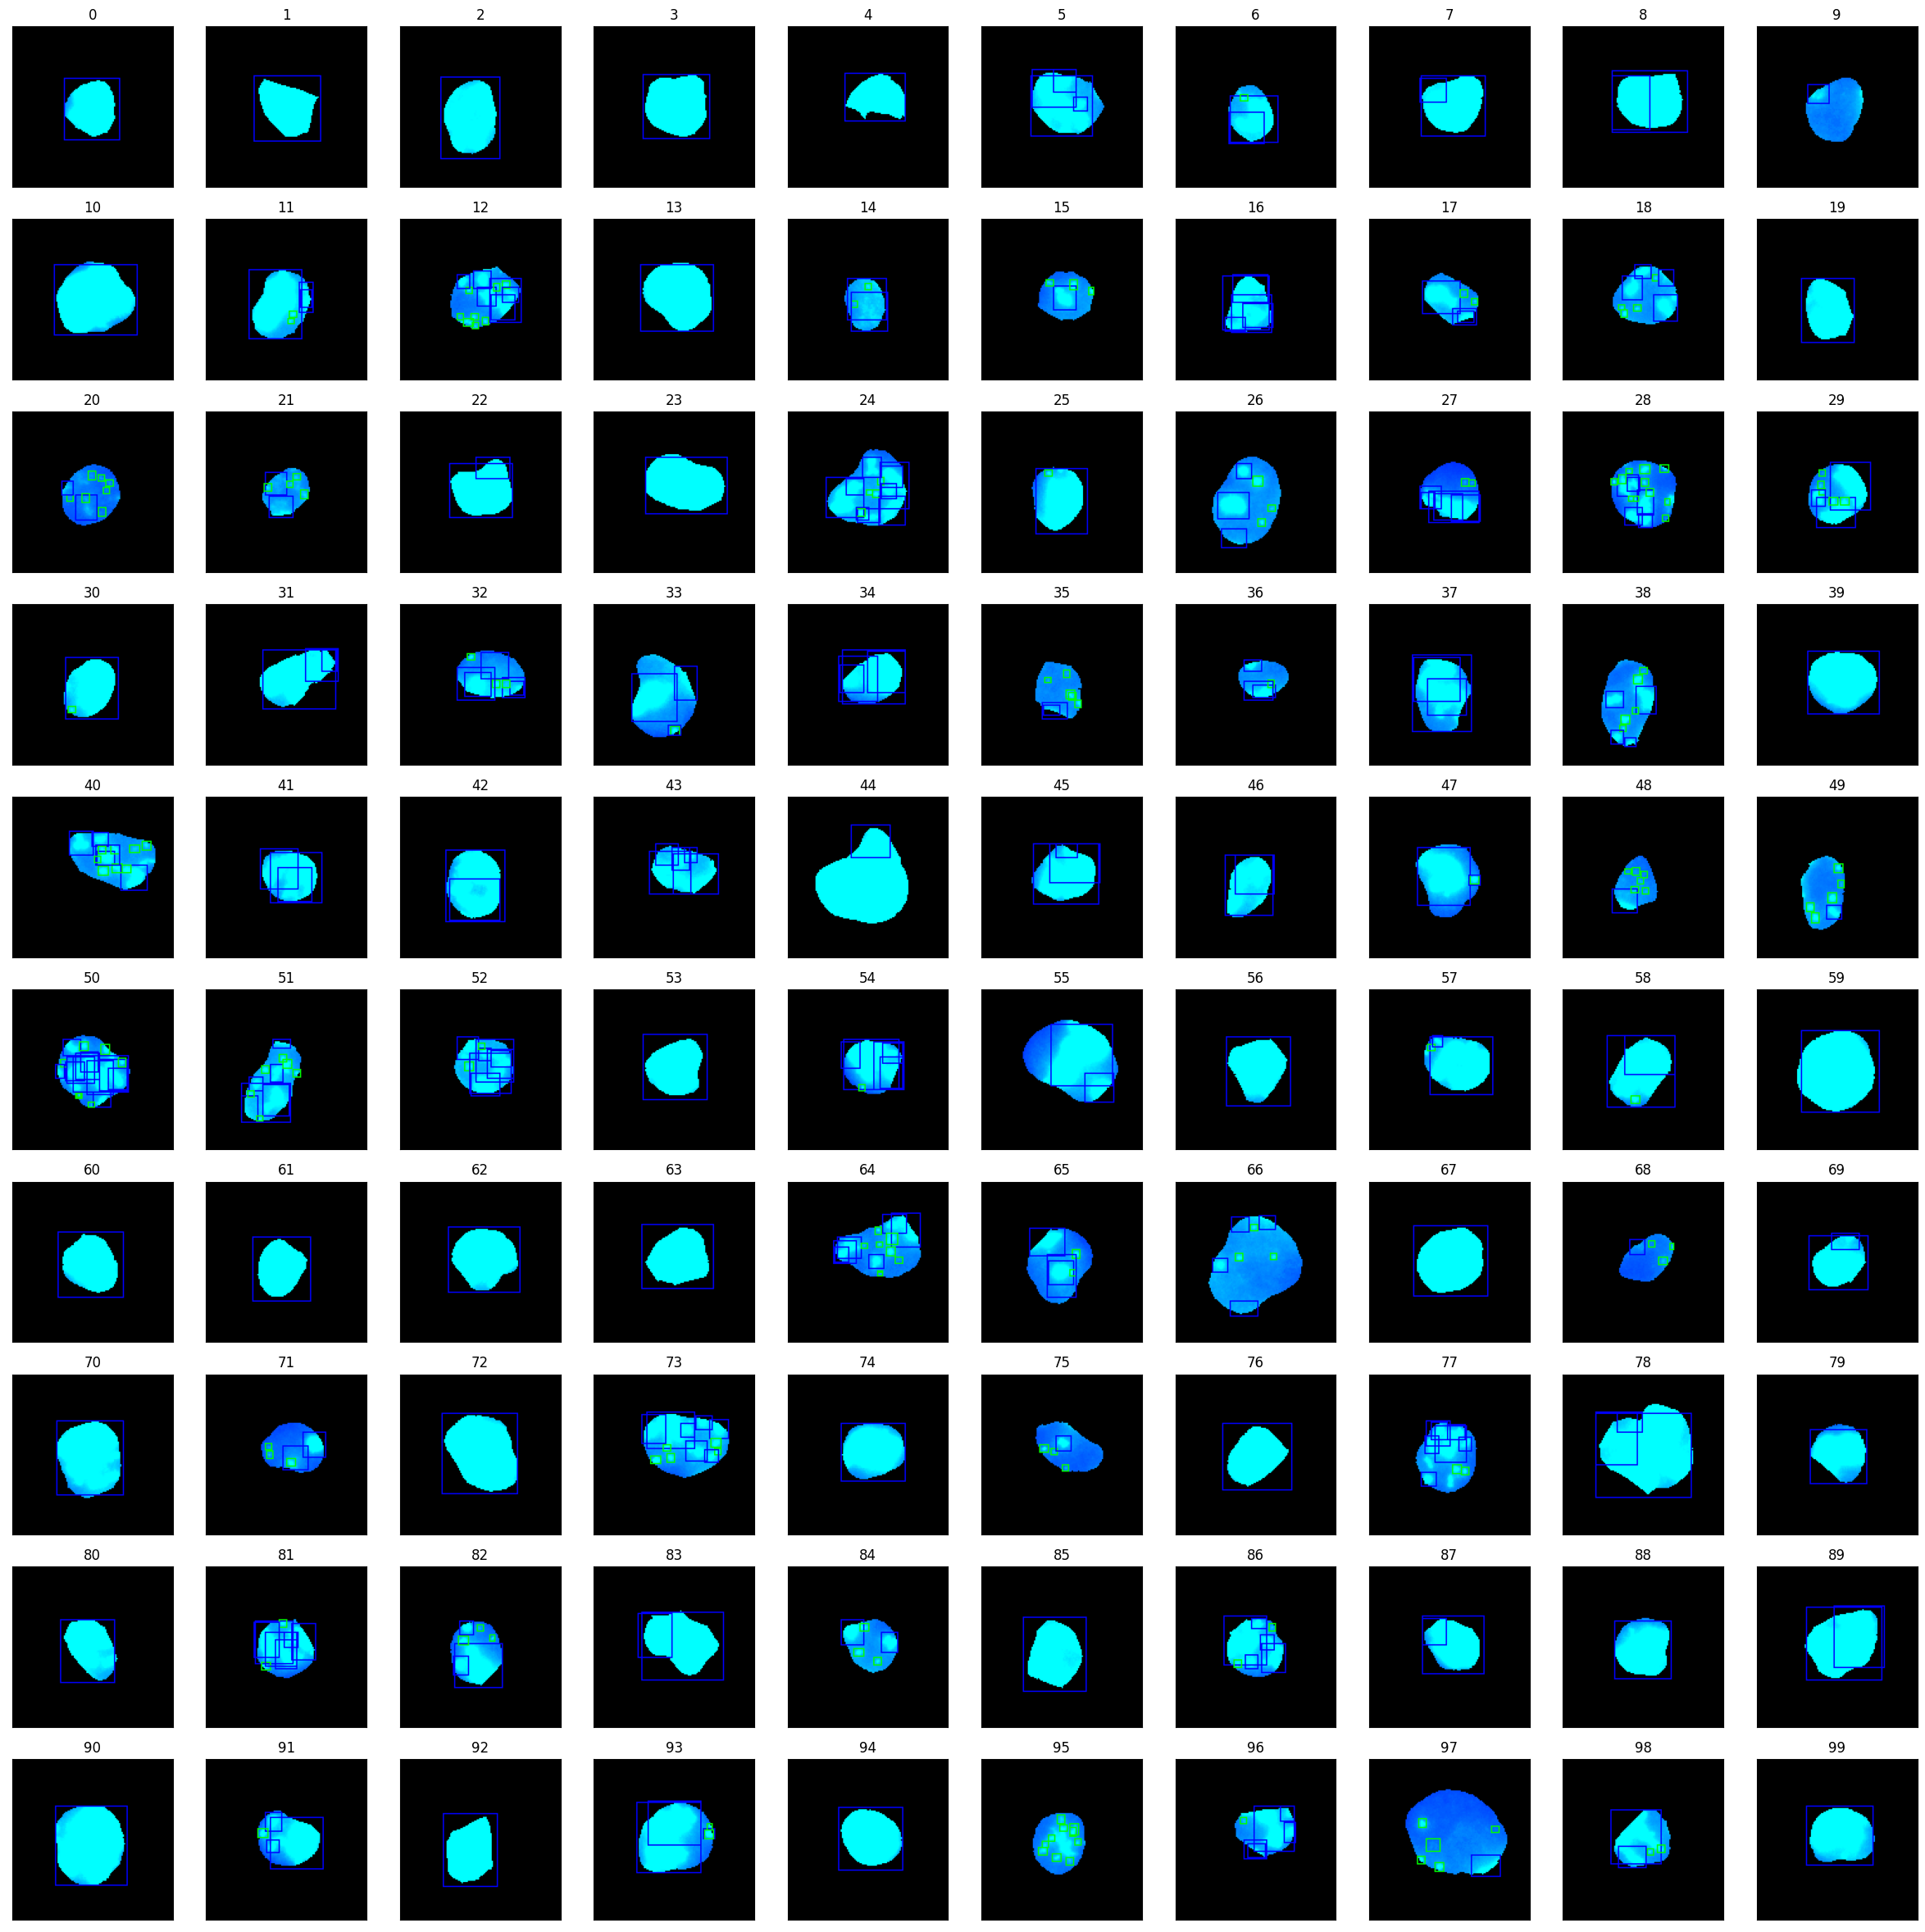

In [64]:
model.to(device)
model.eval()

ims = []
for X, y in dataloader:
    X = torch.clip(X*5, 0,1)
    pred = [{k: v.cpu().detach().numpy() for k,v in pred.items()} for pred in model(X.to(device))]
    for im, dic in zip(X, pred):
        dic["image"] = im
    ims.extend([bbox_on_image(pred_dict, ret=True, threshold=0.5) for pred_dict in pred])

gridPlot(ims)

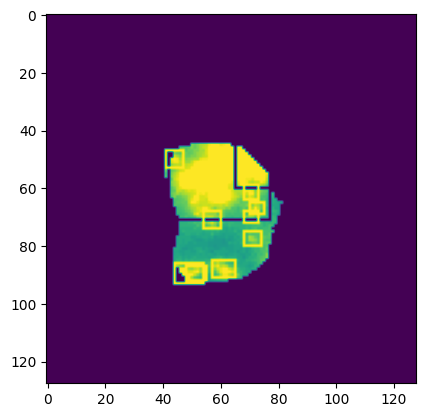

In [65]:
plt.imshow(ims[114][...,1], vmin=0, vmax=255)
plt.show()